In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
df= pd.read_csv('ds_salaries.csv')
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


# What is this dataset talking about (Problem Statement)?

In [100]:
##The dataset contains information about salaries in the data science field. 
##It includes details such as the work year, experience level, employment type, job title, salary, salary currency, salary in USD, 
##employee residence, remote ratio, company location, and company size.

# Which feature is the target variable?

In [101]:
##The target variable appears to be salary_in_usd, as it is a common practice to predict salaries in data science roles.

# Why is this business interested in this target variable?

In [102]:
##Businesses are interested in predicting the salary_in_usd to budget for hiring, to ensure competitive compensation packages, \
##and to understand salary trends in the data science field.

# Why am I predicting this y label (target variable)?


In [103]:
##Predicting the salary_in_usd can help in making informed decisions for recruitment, retaining talent, 
#and analyzing the market rate for various data science roles.

# DESCRIPTIVE STATISTICS

In [104]:
df.shape

(3755, 11)

In [105]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [106]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


In [107]:
df.tail()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L
3754,2021,SE,FT,Data Science Manager,7000000,INR,94665,IN,50,IN,L


# Measure of central tendancy

In [108]:
df.describe(include='number')
#measure of dispersion(max,min)
# max in salary is 450000 and minimum is 5132, 50% of the data lies araound 135000 values

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


# Measure of dispersion

In [109]:
#calculation of range of y label
range=df.salary_in_usd.max()-df.salary_in_usd.min()
print(range) #A larger range indicates a wider spread of values so
#when we say that a larger range indicates a wider spread of values, we're highlighting that the dataset contains values 
#that are more spread out across a broader range, 
#indicating greater variability or dispersion in the data.

444868


In [110]:
#we can also calculate mean and std dv by this method

In [111]:
standar_devition=df.salary_in_usd.std() #finding std dev on target column
print("standar_devition:",standar_devition)
mean= df.salary_in_usd.mean()
print("mean:",mean)
#This is because the standard deviation provides a measure of the variability or 
#dispersion of the values of the target variable around the mean.

standar_devition: 63055.625278224084
mean: 137570.38988015978


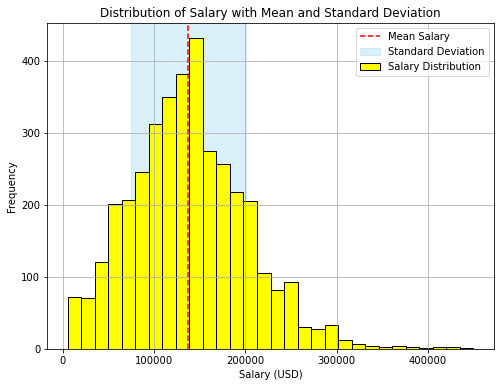

In [112]:
import matplotlib.pyplot as plt

# Plotting the data
plt.figure(figsize=(8, 6))

# Plot a horizontal line for the mean
plt.axvline(x=mean, color='r', linestyle='--', label='Mean Salary')

# Plot a shaded region for the standard deviation
plt.axvspan(mean - standar_devition, mean + standar_devition, alpha=0.3, color='skyblue', label='Standard Deviation')

# Plot histogram of salary_in_usd
plt.hist(df['salary_in_usd'], bins=30, color='yellow', edgecolor='black', label='Salary Distribution')

# Add labels and legend
plt.xlabel('Salary (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Salary with Mean and Standard Deviation')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


In [113]:
df.describe(include='object')
#The most frequent company location is also "US", occurring 3040 times.
#The most frequent job title is "Data Engineer," occurring 1040 times.

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,3755,3755,3755,3755,3755,3755,3755
unique,4,4,93,20,78,72,3
top,SE,FT,Data Engineer,USD,US,US,M
freq,2516,3718,1040,3224,3004,3040,3153


In [114]:
# we use value_counts only for categorical data

In [115]:
df.experience_level.value_counts()# ordinal data as it has some level of 
#ranking se-senior, mi-mid level,en-entry level,ex-expert

SE    2516
MI     805
EN     320
EX     114
Name: experience_level, dtype: int64

In [116]:
df.employment_type.value_counts()#nominal data

FT    3718
PT      17
CT      10
FL      10
Name: employment_type, dtype: int64

In [117]:
df.job_title.value_counts()#nominal data

Data Engineer                          1040
Data Scientist                          840
Data Analyst                            612
Machine Learning Engineer               289
Analytics Engineer                      103
                                       ... 
Principal Machine Learning Engineer       1
Azure Data Engineer                       1
Manager Data Management                   1
Marketing Data Engineer                   1
Finance Data Analyst                      1
Name: job_title, Length: 93, dtype: int64

In [118]:
df.salary_currency.value_counts()#This feature does not seem relevant to target column and the data is nominal

USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name: salary_currency, dtype: int64

In [119]:
df.employee_residence.value_counts()#nominal data

US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
BA       1
AM       1
CY       1
KW       1
MT       1
Name: employee_residence, Length: 78, dtype: int64

In [120]:
df.company_location.value_counts()#nominal data

US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
MK       1
BS       1
IR       1
CR       1
MT       1
Name: company_location, Length: 72, dtype: int64

In [121]:
df.company_size.value_counts()#ordinal data

M    3153
L     454
S     148
Name: company_size, dtype: int64

In [122]:
# Check for unique values in each column
unique_values = df.nunique()
unique_values

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [123]:
#work_year This could be useful for analyzing trends over time.
#experience_level: There are 4 unique values, representing different levels of experience. This can be important for understanding how salary varies with experience.
#employment_type This can impact salary and job availability.
#job_title This diversity can be useful for analyzing salary differences across different positions.
#salary: There are 815 unique values, indicating a wide range of salaries. This variability is expected in salary data.
#salary_currency This is important for standardizing salary data for comparison.
#salary_in_usd This standardized measure is crucial for comparing salaries across different regions.
#employee_residence This can be used to analyze geographical differences in salaries.
#remote_ratio This can impact salary and job satisfaction.
#company_location showing a wide range of company locations. This can be useful for understanding regional differences in salaries.
#company_size This can influence salary levels and job opportunities.

In [124]:
# Check for duplicates 
duplicates = df.duplicated().sum()
duplicates

#There are 1,171 duplicate rows in the dataset. This means that there are multiple entries with 
#identical information across all features.
#The presence of duplicates can affect the analysis and modeling process,as it may lead to biased results or 
#overfitting in machine learning models. Therefore, it is important to address these duplicates.

1171

In [125]:
df.isna().sum() #we can see that we have zero null values present in our data

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [126]:
df_num=df.select_dtypes(include='number')
df_num

,work_year,salary,salary_in_usd,remote_ratio
0,2023,80000,85847,100
1,2023,30000,30000,100
2,2023,25500,25500,100
3,2023,175000,175000,100
4,2023,120000,120000,100
...,...,...,...,...
3750,2020,412000,412000,100
3751,2021,151000,151000,100
3752,2020,105000,105000,100
3753,2020,100000,100000,100


In [127]:
iqr_values = df.quantile(0.75) - df.quantile(0.25)

print("Interquartile Range (IQR) for each column:")
print(iqr_values)

Interquartile Range (IQR) for each column:
work_year            1.0
salary           80000.0
salary_in_usd    80000.0
remote_ratio       100.0
dtype: float64


In [128]:
df_numeric=df.select_dtypes(include='number')
column_ranges =df_numeric.max() - df_numeric.min()
print("Range for each column:")
print(column_ranges)

Range for each column:
work_year               3
salary           30394000
salary_in_usd      444868
remote_ratio          100
dtype: int64


In [129]:
# It will tell us how data is spreed from the center of tendancy
std_values = df.std()
print("Standard deviation for each column:")
print(std_values)

Standard deviation for each column:
work_year             0.691448
salary           671676.500508
salary_in_usd     63055.625278
remote_ratio         48.589050
dtype: float64


C:\Users\Payal Suryawanshi\AppData\Local\Temp\ipykernel_308\329968617.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  std_values = df.std()


In [130]:
df_num.skew()
#work_year has negative skewness it indicates a left-skewed distribution, 
#there is no need of calculating skewness in column work year as it has only four values
#salary has positive skewness it indicates a right-skewed distribution.
#salary_in_usd,remote_ratio has 0 vallue -A skewness value of 0 indicates a perfectly symmetrical distribution   

work_year        -1.016374
salary           28.937932
salary_in_usd     0.536401
remote_ratio      0.149454
dtype: float64

# DATA VISUALIZATION

<AxesSubplot:ylabel='work_year'>

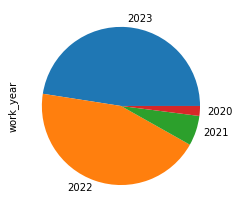

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns



# Plotting histograms
plt.figure(figsize=(12, 8))

# Work Year
plt.subplot(2, 2, 1)
df['work_year'].value_counts().plot(kind='pie')



Text(0, 0.5, 'Frequency')

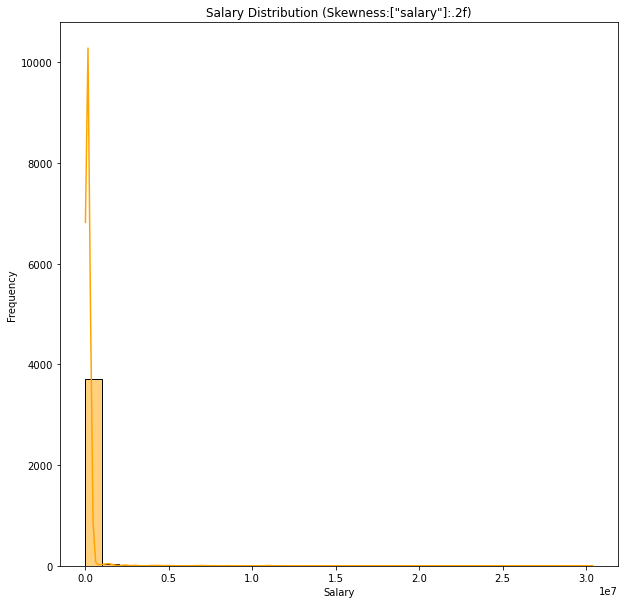

In [133]:
plt.figure(figsize=(10,10))
sns.histplot(df['salary'], bins=30, kde=True, color='orange', edgecolor='black')
plt.title(f'Salary Distribution (Skewness:["salary"]:.2f)')
plt.xlabel('Salary')
plt.ylabel('Frequency')


In [ ]:
#Highly Right-Skewed Distribution, This means that there is a long tail on the right side of the distribution, 
#with a few extremely high salary values pulling the distribution towards the right.
#Concentration of Lower Salaries: The majority of the data points appear to be clustered towards the lower end of the salary range.
#Outliers -There seem to be several outliers on the right side of the distribution,representing individuals with exceptionally high salaries.
#Mean vs. Median: Due to the skewness, the mean salary is likely to be higher than the median salary. This indicates that the average salary is influenced by the presence of high earners, 
#while the median provides a better representation of the typical salary in the dataset.

In [134]:

import pandas as pd
import matplotlib.pyplot as plt


# Univariate Analysis

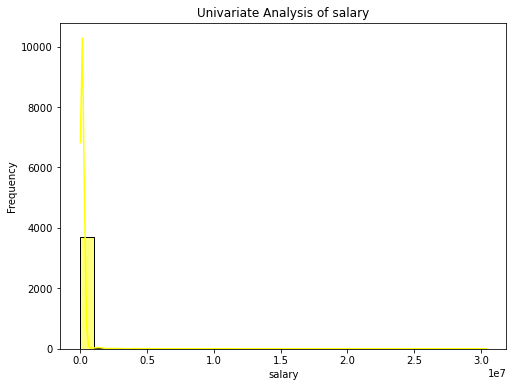

In [135]:
# Univariate analysis for numeric columns

plt.figure(figsize=(8, 6))
sns.histplot(df['salary'],bins=30, kde=True, color='yellow', edgecolor='black')
plt.title("Univariate Analysis of salary")
plt.xlabel('salary')
plt.ylabel('Frequency')
plt.show()

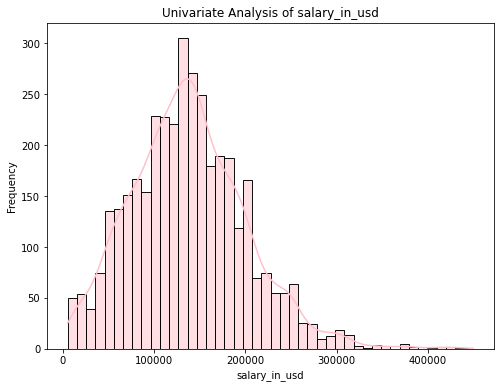

In [136]:
# Univariate analysis for numeric columns

plt.figure(figsize=(8, 6))
sns.histplot(df['salary_in_usd'], kde=True, color='pink', edgecolor='black')
plt.title("Univariate Analysis of salary_in_usd")
plt.xlabel('salary_in_usd')
plt.ylabel('Frequency')
plt.show()

<AxesSubplot:ylabel='remote_ratio'>

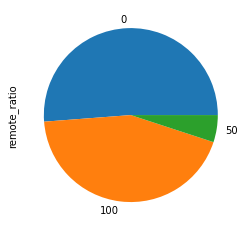

In [137]:
df['remote_ratio'].value_counts().plot(kind='pie')

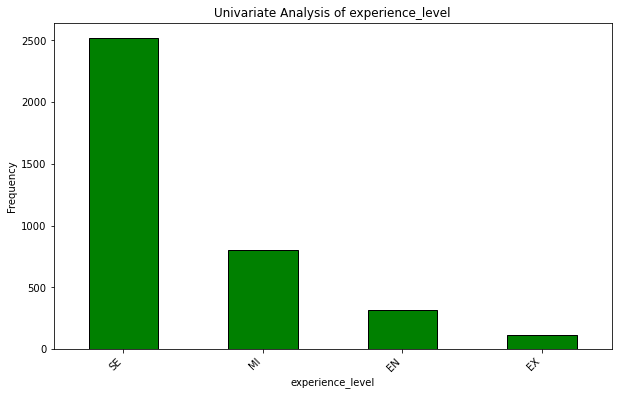

In [138]:
 # Univariate analysis for categorical columns
categorical_columns = ['experience_level', 'employment_type', 'company_size']
plt.figure(figsize=(10, 6))
df['experience_level'].value_counts().plot(kind='bar', color='green', edgecolor='black')
plt.title("Univariate Analysis of experience_level")
plt.xlabel('experience_level')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

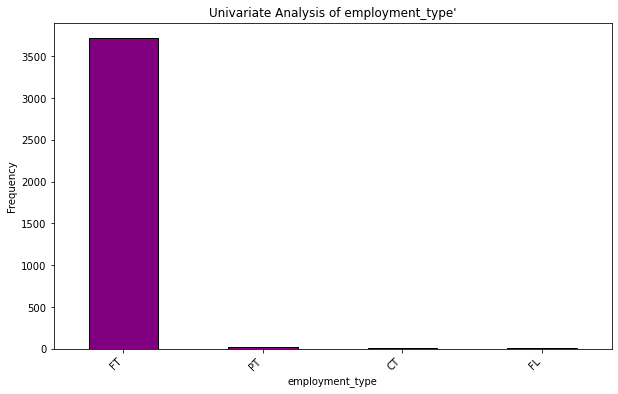

In [139]:
plt.figure(figsize=(10, 6))
df['employment_type'].value_counts().plot(kind='bar', color='purple', edgecolor='black')
plt.title("Univariate Analysis of employment_type'")
plt.xlabel('employment_type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

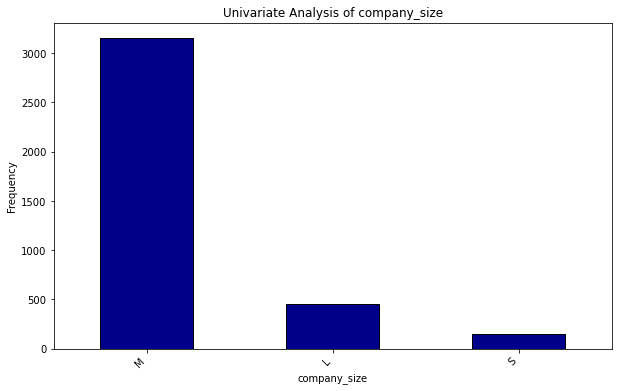

In [140]:
plt.figure(figsize=(10, 6))
df['company_size'].value_counts().plot(kind='bar', color='darkblue', edgecolor='black')
plt.title("Univariate Analysis of company_size")
plt.xlabel('company_size')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

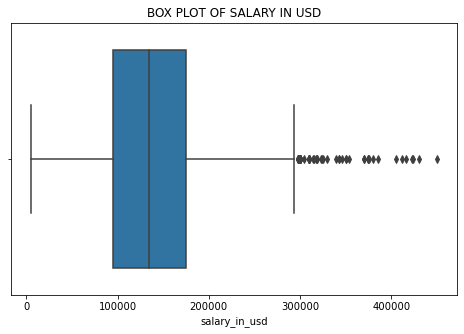

In [141]:
#univariate box plot for salary in usd

plt.figure(figsize=(8,5))
sns.boxplot(x=df["salary_in_usd"])
plt.title("BOX PLOT OF SALARY IN USD")
plt.xlabel("salary_in_usd")
plt.show()

# Bivariate Analysis

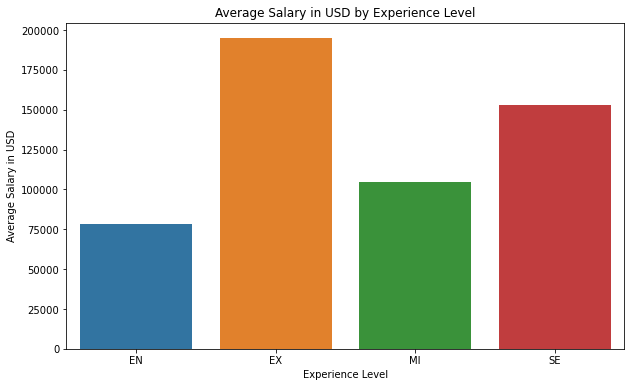

In [142]:
avg_salary_by_experience = df.groupby('experience_level')['salary_in_usd'].mean().reset_index()

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_salary_by_experience, x='experience_level', y='salary_in_usd', ci=None)
plt.title('Average Salary in USD by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary in USD')
plt.show()

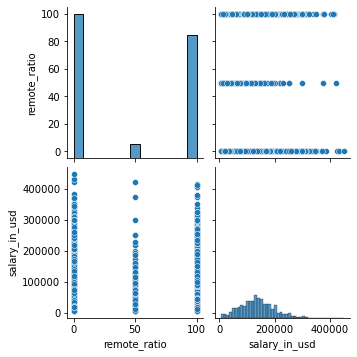

In [143]:
sns.pairplot(df[['remote_ratio', 'salary_in_usd',]])
plt.show()

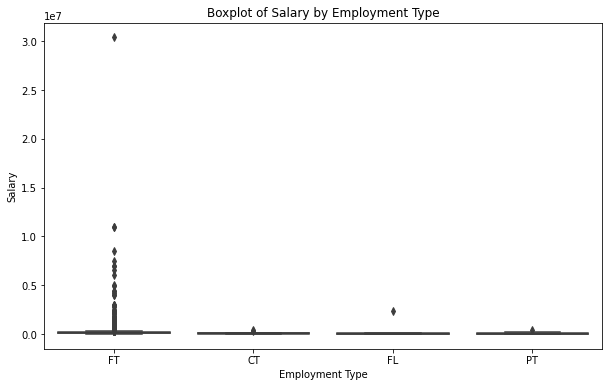

In [144]:
# Bivariate analysis: Numeric vs. Categorical
plt.figure(figsize=(10, 6))
sns.boxplot(x='employment_type', y='salary', data=df)
plt.title('Boxplot of Salary by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.show()


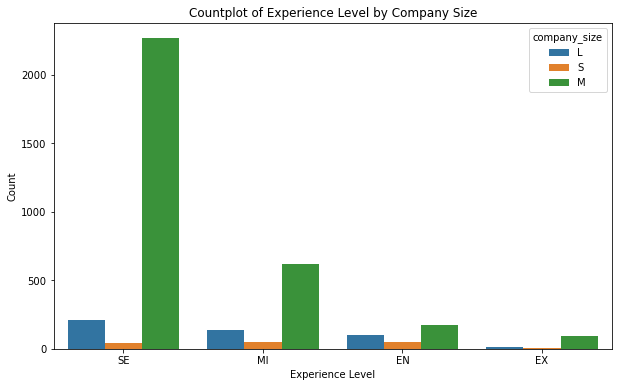

In [145]:
#Bivariate analysis: Categorical vs. Categorical
plt.figure(figsize=(10, 6))
sns.countplot(x='experience_level', hue='company_size', data=df)
plt.title('Countplot of Experience Level by Company Size')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()

# DATA PREPROCESSING

In [146]:
df = df.drop_duplicates() #Removing dublicates 

<AxesSubplot:xlabel='salary_in_usd'>

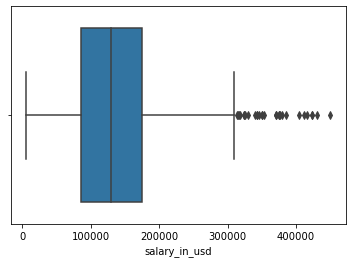

In [147]:
sns.boxplot(x=df["salary_in_usd"])

In [148]:
# Observation: The box plot presents the distribution of salary in usd values in a compact manner. It indicates the median (line inside the box), interquartile range (box), 
#and presence of outliers (points outside the whiskers).

In [162]:
#outlier removal as we saw there was outliers
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1
df = df[~((df['salary_in_usd'] < (Q1 - 1.5 * IQR)) | (df['salary_in_usd'] > (Q3 + 1.5 * IQR)))]

<AxesSubplot:xlabel='salary_in_usd'>

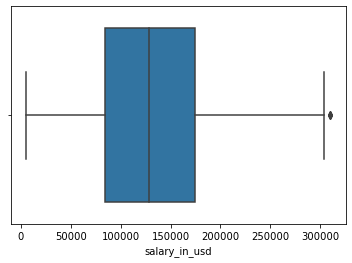

In [150]:
sns.boxplot(x=df["salary_in_usd"])

In [151]:
#no outlier is present outside the wisker

In [152]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Label Encoding for 'experience_level' as it has order 
label_encoder = LabelEncoder()
df['experience_level_encoded'] = label_encoder.fit_transform(df['experience_level'])  
df =df.drop(['experience_level'],axis=1)
df.head()

,work_year,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,experience_level_encoded
0,2023,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,3
1,2023,CT,ML Engineer,30000,USD,30000,US,100,US,S,2
2,2023,CT,ML Engineer,25500,USD,25500,US,100,US,S,2
3,2023,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,3
4,2023,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,3


In [153]:
# One-Hot Encoding for 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size' as it doesnot hold any order 
one_hot_columns = ['employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
df = pd.get_dummies(df, columns=one_hot_columns,drop_first=True)

# Display the first few rows of the updated dataset
df.head()

,work_year,salary,salary_in_usd,remote_ratio,experience_level_encoded,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Developer,job_title_AI Programmer,...,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,company_size_M,company_size_S
0,2023,80000,85847,100,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,30000,30000,100,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,2023,25500,25500,100,2,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,2023,175000,175000,100,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2023,120000,120000,100,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [154]:
#remote_ratio: This column represents the percentage of remote work, with values ranging from 0 to 100. 
#Using MinMaxScaler for this feature ensures that the scaled values will also be between 0 and 1, 
#maintaining the interpretability of the percentage.
#salary: Salaries can vary widely and may have a more complex distribution.StandardScaler is used for
#this feature to transform the data such that its distribution will have a mean value 0 and standard deviation of 1.

In [155]:
from sklearn.model_selection import train_test_split

# Define the target variable (y) and input features (X)
y = df['salary_in_usd']
X = df.drop(['salary_in_usd'], axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Display the shapes of the training and testing sets
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)


Training set: (1788, 265) (1788,)
Testing set: (767, 265) (767,)


In [156]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [157]:
X.shape, y.shape

((2555, 265), (2555,))

In [158]:
del range

In [159]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Initialize a list to store evaluation metrics
evaluation_metrics = []

# Loop over different values of k
for k in range(1, 11):  # Change the range as per your requirement
    # Initialize the KNN regressor with the current value of k
    knn_regressor = KNeighborsRegressor(n_neighbors=k)
    
    # Fit the model on the training data
    knn_regressor.fit(X_train, y_train)
    
    # Make predictions on the testing data
    y_pred = knn_regressor.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Append the metrics to the list
    evaluation_metrics.append({
        'k': k,
        'MSE': mse,
        'MAE': mae,
    })

# Convert the list of metrics to a dataframe
evaluation_metrics_df = pd.DataFrame(evaluation_metrics)

# Display the dataframe
evaluation_metrics_df

,k,MSE,MAE
0,1,1.605062e+08,2797.722295
1,2,1.774631e+08,3152.262712
2,3,1.586016e+08,3246.843112
3,4,1.291109e+08,3091.219361
4,5,1.216151e+08,3178.561669
5,6,1.208241e+08,3346.354411
6,7,1.182422e+08,3380.287391
7,8,1.175147e+08,3417.072197
8,9,1.164001e+08,3530.624511
9,10,1.191491e+08,3605.357366


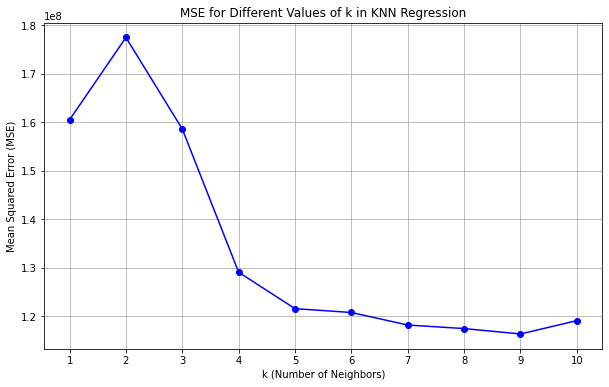

In [160]:
#Extract MSE values from the evaluation metrics dataframe
mse_values = evaluation_metrics_df['MSE']

# Plot the MSE values for different values of k
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), mse_values, marker='o', linestyle='-', color='b')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE for Different Values of k in KNN Regression')
plt.xticks(range(1, 11))  # Adjust this according to the range of k values you used
plt.grid(True)
plt.show()

choosing the optimal value of k as 8 as its the second lowest value which provides the minimum error inn term s of mse considering the generalization of model 


In [161]:
# Initialize the KNN regressor with k=3
knn_regressor_best = KNeighborsRegressor(n_neighbors=8)

# Fit the model on the training data
knn_regressor_best.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_best = knn_regressor_best.predict(X_test)

# Calculate evaluation metrics for the best model
mse_best = mean_squared_error(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)

# Print the evaluation metrics for the best model
print(f"Best KNN Regressor (k=8) Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse_best}")
print(f"Mean Absolute Error (MAE): {mae_best}")


Best KNN Regressor (k=8) Evaluation Metrics:
Mean Squared Error (MSE): 117514675.13512467
Mean Absolute Error (MAE): 3417.072196870926
